In [1]:
using Plots, ComplexPhasePortrait, ApproxFun


$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk



# Lecture 2: Cauchy's theorem

References: 

1. M.J. Ablowitz & A.S. Fokas, Complex Variables: Introduction and Applications, Second Edition, Cambridge University Press, 2003
2. R. Earl, Metric Spaces and Complex Analysis, https://courses.maths.ox.ac.uk/node/view_material/5392, 2015


### Complex-differentiable functions 


**Definition (Complex-differentiable)** Let $D \subset {\mathbb C}$ be an open set.  A function $f : D \rightarrow {\mathbb C}$ is called _complex-differentiable_ at a point $z_0 \in D$ if 
$$ 
   f'(z_0) =  \lim_{z \rightarrow z_0} {f(z) - f(z_0) \over z - z_0}
$$
exists, for any angle of approach to $z_0$.

### Holomorphic functions

**Definition (Holomorphic)** Let $D \subset {\mathbb C}$ be an open set.  A function $f : D \rightarrow {\mathbb C}$ is called _holomorphic_ in $D$ if it is complex-differentiable at all $z \in D$.

**Definition (Entire)** A function is _entire_ if it is holomorphic in ${\mathbb C}$


*Examples*

1. $1$ is entire
2. $z$ is entire
3. $1/z$ is holomorphic in ${\mathbb C} \backslash \{0\}$
4. $\sin z$ is entire
5. $\csc z$ is holomorphic in ${\mathbb C} \backslash \{\ldots,-2\pi,-\pi,0,\pi,2\pi,\ldots\}$
6. $\sqrt z$ is holomorphic in ${\mathbb C} \backslash (-\infty,0]$

We can usually infer the domain where a function is holomorphic from a phase portrait, here we see that ${\rm arcsinh}\, z$ has cuts on $[\I,\I \infty)$ and $[-\I,-\I \infty)$, and a zero  (red–green–blue–red) at zero, hence we can infer that it is holomorphic in $\C \backslash ([\I,\I \infty) \cup [-\I,-\I \infty))$.

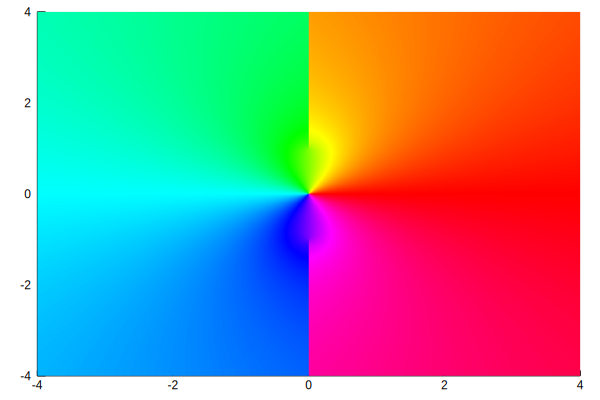

In [15]:
phaseplot(-4..4, -4..4, z -> asinh(z))

The following example $\sqrt{z-1} \sqrt{z+1}$ is analytic in ${\mathbb C}\backslash [-1,1]$ and will be returned to:

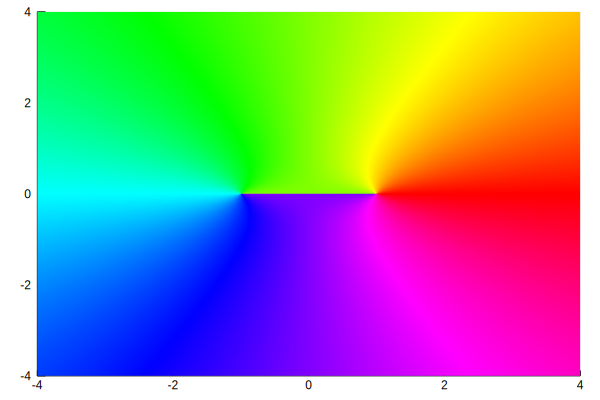

In [3]:
phaseplot(-4..4, -4..4, z -> sqrt(z-1)sqrt(z+1))

## Contours

**Definition (Contour)** A _contour_  is a continuous & piecewise-continuously differentiable function $\gamma : [a,b] \rightarrow {\mathbb C}$.

**Definition (Simple)** A _simple contour_ is a contour that is 1-to-1.

**Definition (Closed)** A _closed contour_ is a contour such that $\gamma(a) = \gamma(b)$

*Examples of contours*

1. Line segment $[a,b]$ is a simple contour, with $\gamma(t) =  t$
1. Arc from $re^{ia}$ to $re^{ib}$ is a simple contour, with $\gamma(t) =  re^{i t}$
2. Circle of radius $r$ is a closed simple contour, with $\gamma(t) = re^{i t}$ and $a = -\pi$, $b = \pi$
3. $\gamma(t) = \cos (t+i)^2$ defines a contour that is not simple or closed
4. $\gamma(t) = e^{i t} + e^{2i t}$ for $[a,b] = [-\pi,\pi]$ defines a contour that is closed but not simple

Here's an example of a closed contour that is not simple:

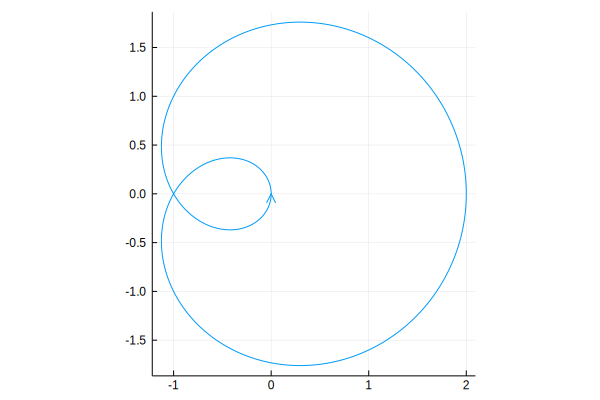

In [13]:
a,b = -π, π
tt = range(a, stop=b, length=1000)

γ = t -> exp(im*t) +exp(2im*t)

plot(real.(γ.(tt)), imag.(γ.(tt)); ratio=1.0, legend=false, arrow=true)

## Contour integrals

**Definition (Contour integral)** The _contour integral_ over $\gamma$ is defined by
$$
\int_\gamma f(z) dz := \int_a^b f(\gamma(t)) \gamma'(t) dt
$$



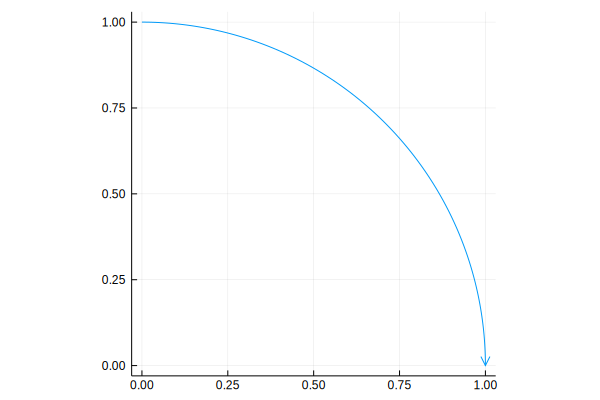

In [14]:
f = Fun( z -> real(exp(z)), Arc(0.,1.,(0,π/2)))  # Not holomorphic!

plot(domain(f); legend=false, ratio=1.0, arrow=true)

In [6]:
sum(f)  # this means contour integral

-1.2485382363935424 + 1.949326343919058im

In [7]:
g = im*Fun(t-> f(exp(im*t))*exp(im*t), 0 .. π/2)
sum( g )  # this is standard integral

-1.2485382363935429 + 1.9493263439190578im

An important property of a contour is its _arclength_:

**Definition (Arclength)** The _arclength_ of $\gamma$ is defined as
$$
    {\cal L}(\gamma) := \int_a^b |\gamma'(t)| dt
$$

A very useful result is that we can use the maximum and arclength to bound integrals:

**Proposition (ML)** Let $f : \gamma \rightarrow {\mathbb C}$ and 
$$
        M = \sup_{z \in \gamma} |f(z)|
$$        
Then
$$
    \left|\int_\gamma f(z) dz \right| \leq M {\cal L}(\gamma)
    $$

## Cauchy's theorem

**Proposition** If $f(z)$ is holomorphic on $\gamma$, then
$$\int_\gamma f'(z) dz = f(\gamma(b)) - f(\gamma(a))$$

In [8]:
f = Fun( z -> exp(z), Arc(0.,1.,(0,π/2)))  # Not holomorphic!

sum(f)  , f(im)-f(1)

(-2.1779795225909058 + 0.8414709848078968im, -2.177979522590906 + 0.8414709848078968im)

In [9]:
f = Fun( z -> exp(z), Arc(0.,1.,(0,π/2)))  # Holomorphic!

sum(f)  , f(im)-f(1)

(-2.1779795225909058 + 0.8414709848078968im, -2.177979522590906 + 0.8414709848078968im)

In [10]:
f = Fun( z -> exp(z), Segment(1,im))  # Holomorphic!

sum(f)  , f(im)-f(1)

(-2.1779795225909053 + 0.8414709848078966im, -2.177979522590907 + 0.8414709848078968im)

**Theorem (Cauchy)** If $f$ is holomorphic inside and on a closed contour $\gamma$, then 
$$\oint_\gamma f(z) dz = 0$$

In [11]:
f = Fun( z -> real(exp(z)), Circle())  # Not holomorphic!

sum(f)

-3.3420237696193494e-16 + 3.141592653589793im

In [12]:
f = Fun( z -> exp(z), Circle())  #  Holomorphic!

sum(f)

2.9644937254112756e-17 - 1.4872544363724962e-16im